In [75]:

from __future__ import print_function
from keras.models import Sequential
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
from keras.layers import GaussianNoise 
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from keras import regularizers

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(125, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
               metrics=['accuracy'])

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.4545 - accuracy: 0.8671 - val_loss: 0.2262 - val_accuracy: 0.9305
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1865 - accuracy: 0.9455 - val_loss: 0.1499 - val_accuracy: 0.9529
Epoch 3/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.1338 - accuracy: 0.9602 - val_loss: 0.1150 - val_accuracy: 0.9644
Epoch 4/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.1032 - accuracy: 0.9689 - val_loss: 0.1037 - val_accuracy: 0.9665
Epoch 5/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0843 - accuracy: 0.9743 - val_loss: 0.0967 - val_accuracy: 0.9684
Epoch 6/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0712 - accuracy: 0.9783 - val_loss: 0.0800 - val_accuracy: 0.9751
Epoch 7/10
60000/60000 [==============================] - 3s 55us/st

In [2]:

history = fit_info
model.summary()
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 125)               98125     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               12600     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 116,285
Trainable params: 116,285
Non-trainable params: 0
_________________________________________________________________
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## 1.a
We see that there are 5 layers in total
The layers have 784, 125, 100, 50 and 10 neurons respectively.
There are 116285 parameters in total, there is one parameter for each combination of neurons between every consecutive pairs of layers, and there is one parameter for each neuron except for teh ones in the first input layer.
## 1.b
see above

# 2

In [76]:
# plot graphs of accuracies and losses if plot = True
# also returns a tuple of the lr, neurons and accuracies and losses for training and test data
def plotAccs(epochs, lr, neurons, plot, noise,reg):
    batch_size = 128
    num_classes = 10
    # input image dimensions
    img_rows, img_cols = 28, 28

    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    ## Define model ##
    model = Sequential()

    model.add(Flatten())
    if noise != 0:
        model.add(GaussianNoise(noise))
    if reg != 0:
           model.add(Dense(neurons, activation = 'relu',kernel_regularizer=regularizers.l2(reg)))
    else:
        model.add(Dense(neurons, activation = 'relu'))
    model.add(Dense(num_classes, activation='softmax'))


    model.compile(loss=keras.losses.categorical_crossentropy,
                   optimizer=keras.optimizers.SGD(lr),
                   metrics=['accuracy'])

    fit_info = model.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=0,
               validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    #print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    
    # ----------------- print --------------
    if plot:
        history = fit_info
            #model.summary()
        # list all data in history
            #print(history.history.keys())
        # summarize history for accuracy
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        # summarize history for loss
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        
    loss = fit_info.history['loss'][epochs-1]
    val_loss = fit_info.history['val_loss'][epochs-1]
    accuracy = fit_info.history['accuracy'][epochs-1]
    val_accuracy = fit_info.history['val_accuracy'][epochs-1]
    
    return (lr, neurons, noise, loss,val_loss, accuracy, val_accuracy)

In [77]:
# make bar chart of accuracies and losses
def barChart(results):
    labels = []
    losses = []
    val_losses = []
    accuracies = []
    val_accuracies = []

    for result in results:
        labels.append("lr:" + str(result[0]) + "\n" + "nr:" + str(result[1]) + "\n" + "ns:" + str(result[2]))
        losses.append(result[3])
        val_losses.append(result[4])
        accuracies.append(result[5])
        val_accuracies.append(result[6])

    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 3*width/2, losses, width, label='losses')
    rects2 = ax.bar(x - width/2, val_losses, width, label='val_losses')
    rects3 = ax.bar(x + width/2, accuracies, width, label='accuracies')
    rects4 = ax.bar(x + 3*width/2, val_accuracies, width, label='val_accuracies')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('values')
    ax.set_title('Loss and accuracy for train and test data for different learning rates and #neurons', y=1.2)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2, 
                borderaxespad=0, frameon=False)


    fig.tight_layout()
    fig.set_size_inches(18.5, 10.5)
    plt.show()

In [74]:
plotAccs(30,0.1,100,True,0,0)
    

TypeError: plotAccs() takes 5 positional arguments but 6 were given

__________________________ lr = 0.001 ___________________________


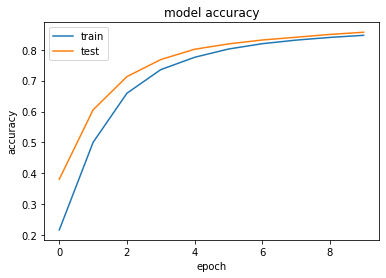

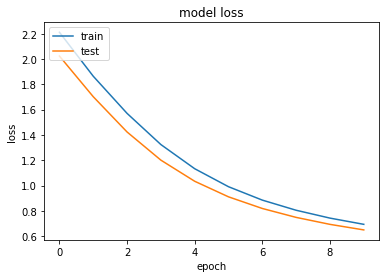

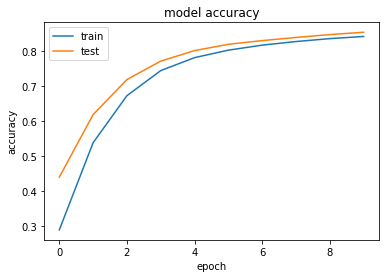

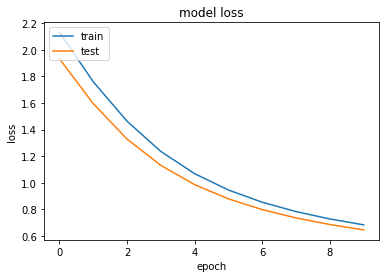

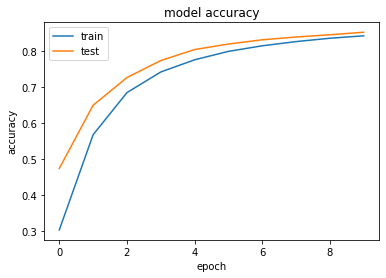

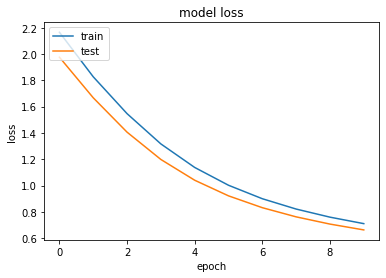

__________________________ lr = 0.01 ___________________________


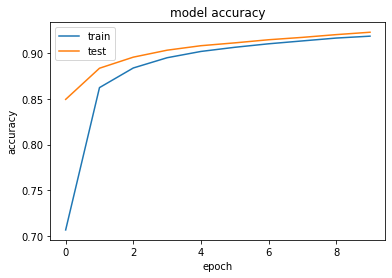

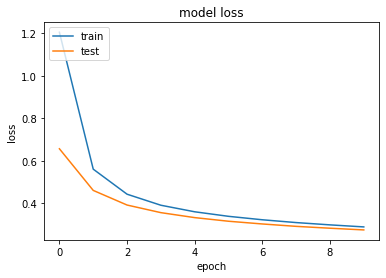

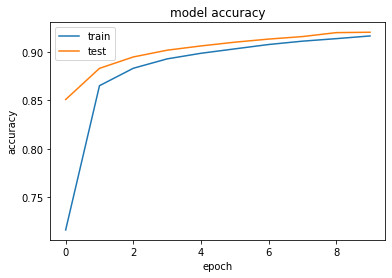

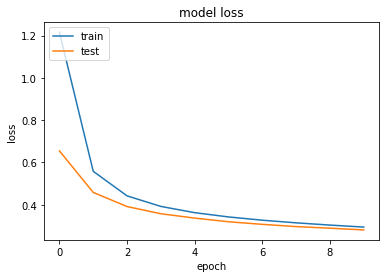

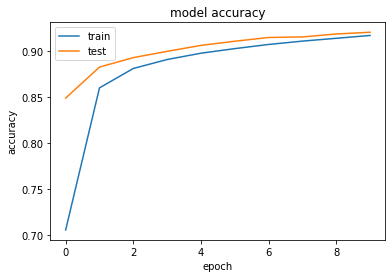

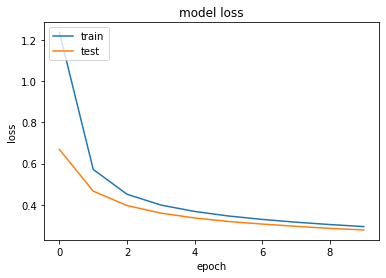

__________________________ lr = 0.1 ___________________________


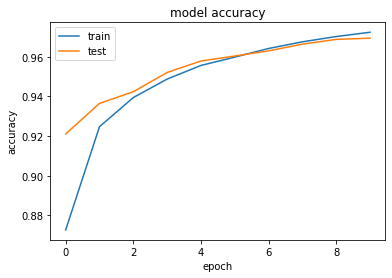

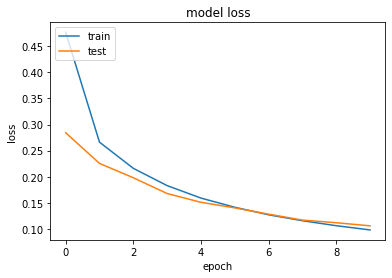

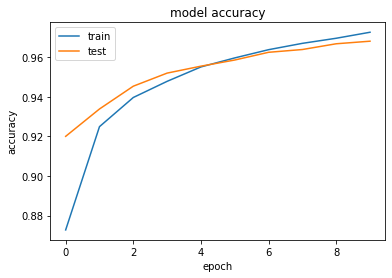

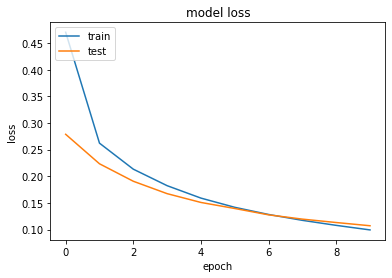

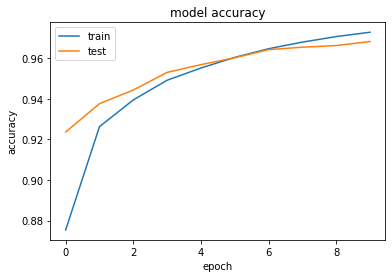

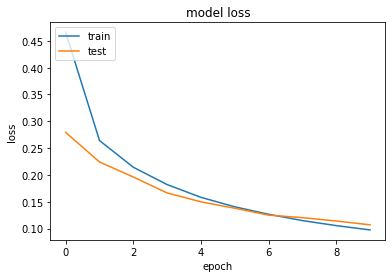

__________________________ lr = 1 ___________________________


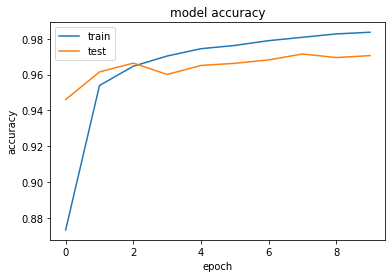

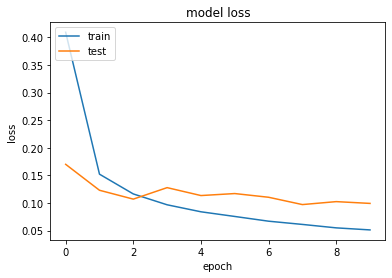

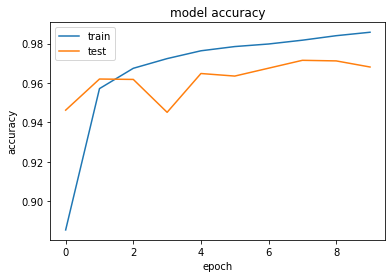

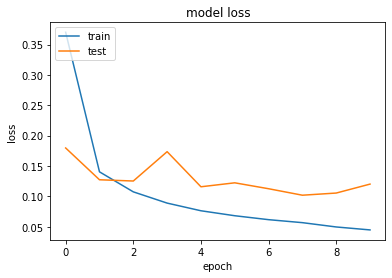

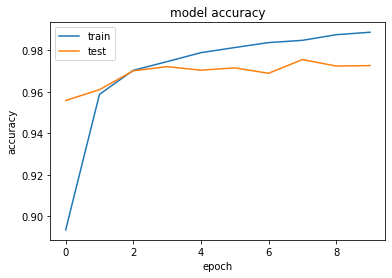

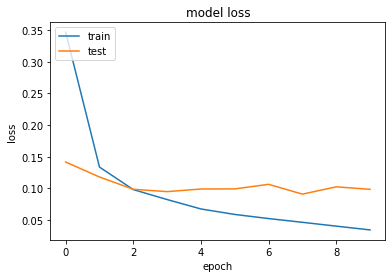

done


In [46]:
results = []

print("__________________________ lr = 0.001 ___________________________")
results.append(plotAccs(10,0.001,100,True,0,0))
results.append(plotAccs(10,0.001,100,True,0,0))
results.append(plotAccs(10,0.001,100,True,0,0))
print("__________________________ lr = 0.01 ___________________________")
results.append(plotAccs(10,0.01,100,True,0,0))
results.append(plotAccs(10,0.01,100,True,0,0))
results.append(plotAccs(10,0.01,100,True,0,0))
print("__________________________ lr = 0.1 ___________________________")
results.append(plotAccs(10,0.1,100,True,0,0))
results.append(plotAccs(10,0.1,100,True,0,0))
results.append(plotAccs(10,0.1,100,True,0,0))
print("__________________________ lr = 1 ___________________________")
results.append(plotAccs(10,1,100,True,0,0))
results.append(plotAccs(10,1,100,True,0,0))
results.append(plotAccs(10,1,100,True,0,0))
print("done")



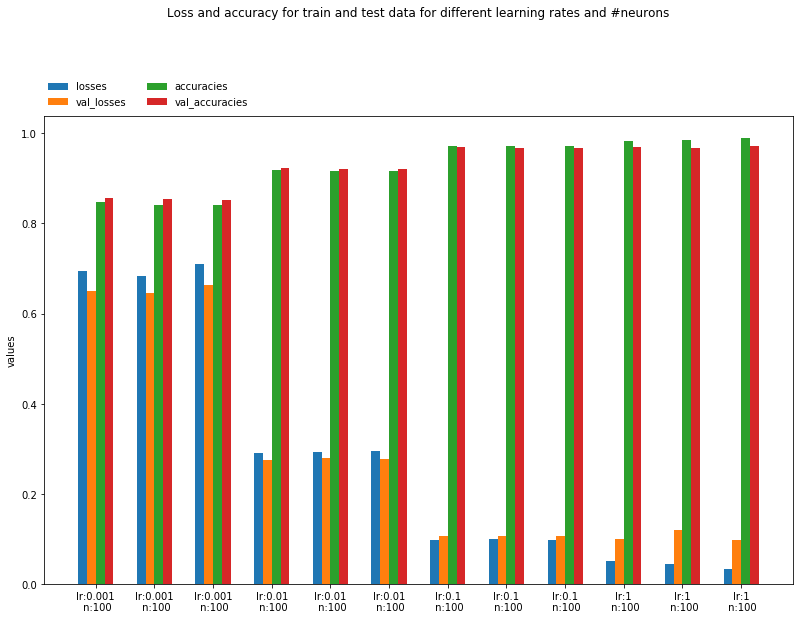

In [60]:
barChart(results)

## 2.b
We see an improvement in accuracy and loss generally as learning rate increases. If we compare lr=1 to lr=0.1:
lr = 1:
    final test acc: 0.97
    final train acc: 0.985
    final test loss: 0.1
    final train loss: 0.05
lr = 0.01:
    final test acc: 0.965
    final train acc: 0.975
    final test loss: 0.11
    final train loss: 0.1
lr = 0.01
    final test acc: 0.85
    final train acc: 0.85
    final test loss: 0.7
    final train loss: 0.7

We see that the accuracy increase and loss decrease is dramatic betwen lr =0.01 and 0.1. It improves a bit from lr=0.1 to 1. But lr=1 has a big downside, it appears that the test data accuracy and loss curves deviate a lot and performs much wrose than the corresponding training data, compared to the other lr values. So lr=0.1 is probably better than lr=1 even though it has slightly worse performance in these test, since we might get unlucky and get really bad accuracy and loss with lr=1.

## 2.c
last acc
last loss
neurons
lr


__________________________ neurons=10 lr = 0.001 ___________________________


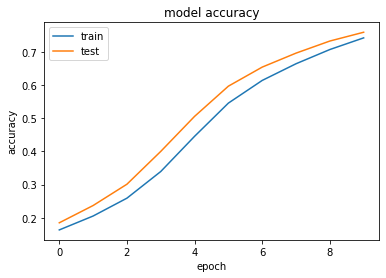

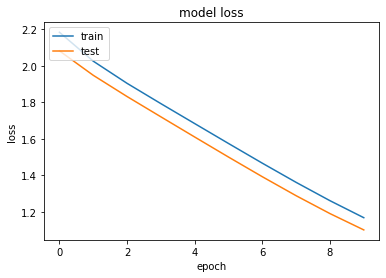

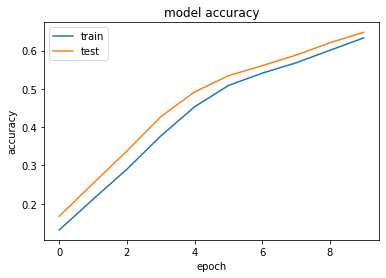

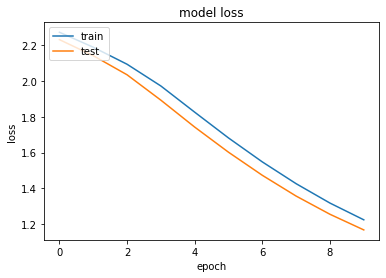

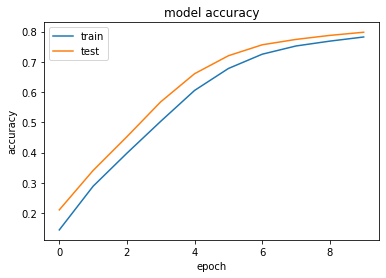

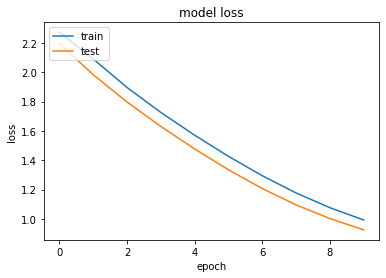

__________________________ neurons=10 lr = 0.01 ___________________________


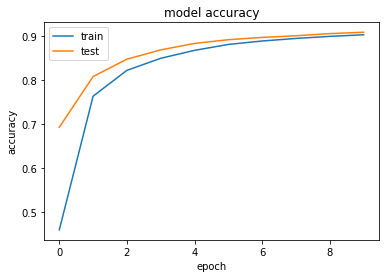

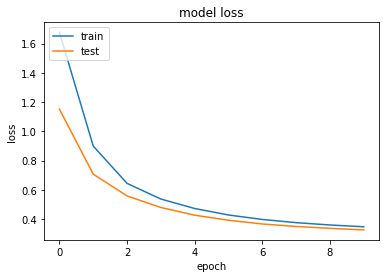

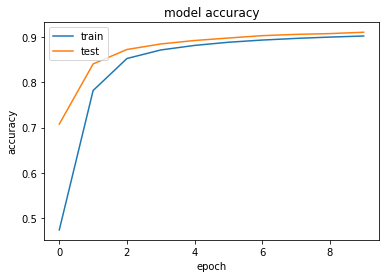

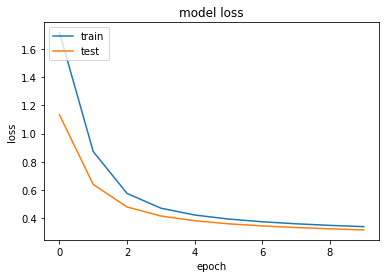

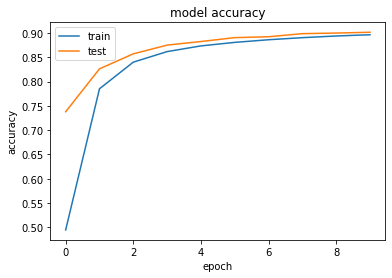

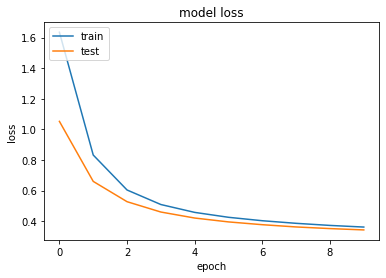

__________________________ neurons=10 lr = 0.1 ___________________________


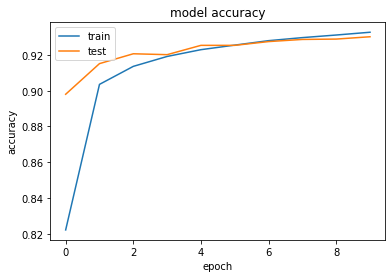

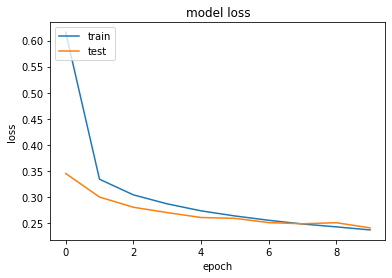

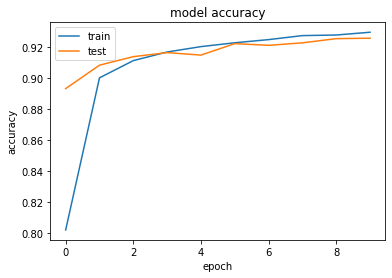

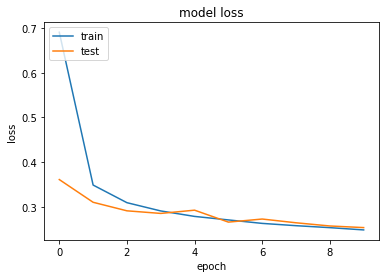

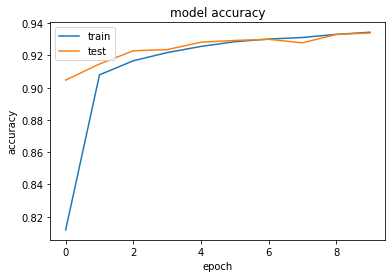

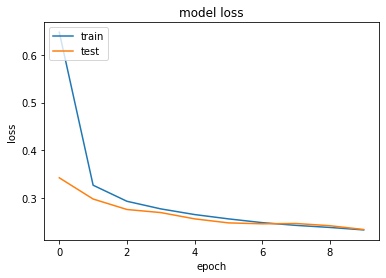

__________________________ neurons=100 lr = 0.001 ___________________________


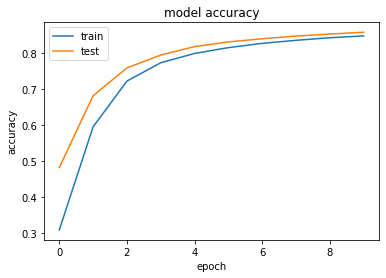

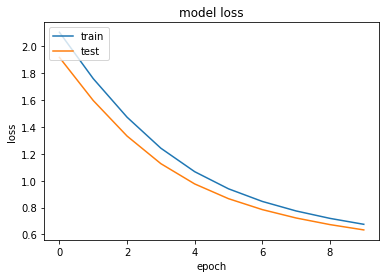

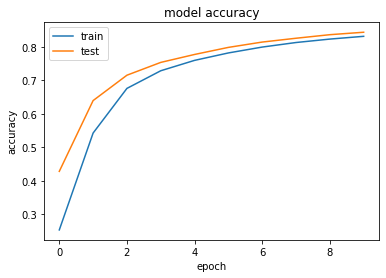

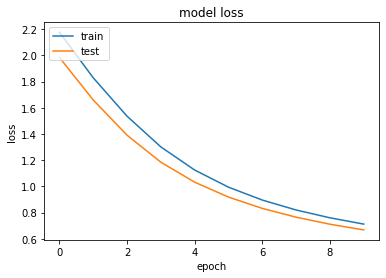

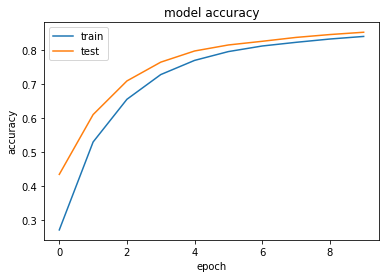

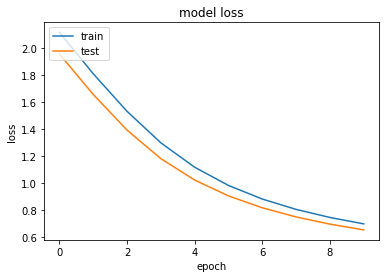

__________________________ neurons=100 lr = 0.01 ___________________________


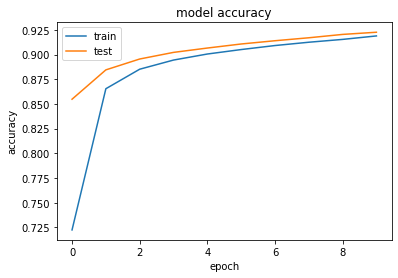

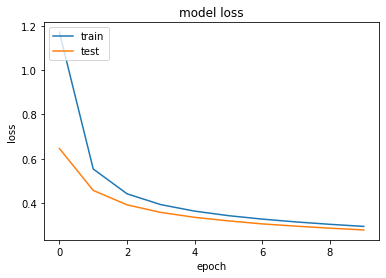

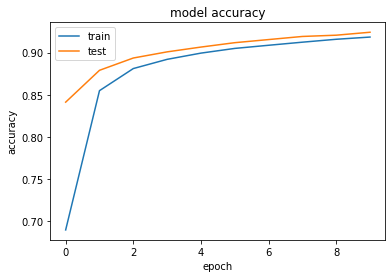

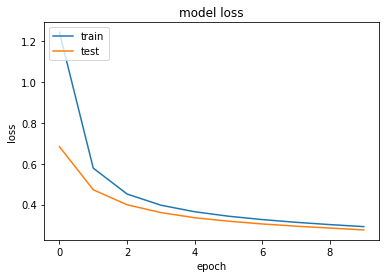

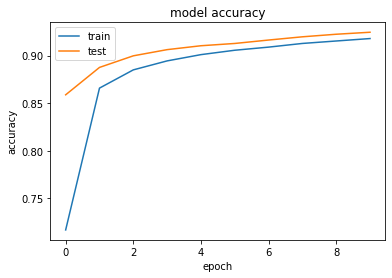

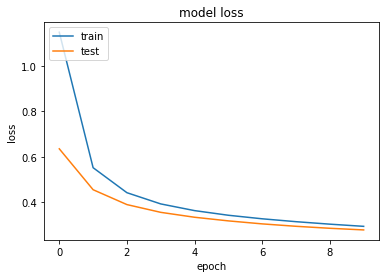

__________________________ neurons=100 lr = 0.1 ___________________________


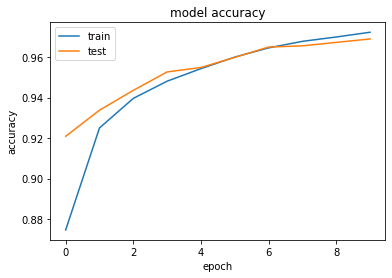

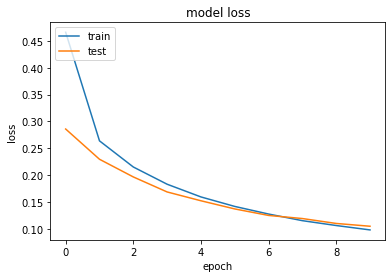

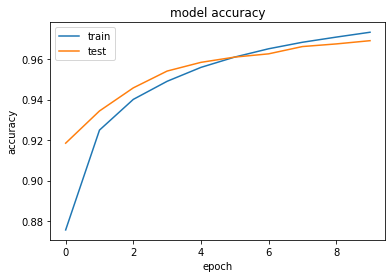

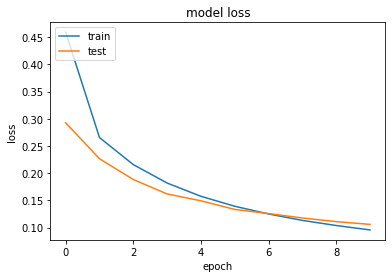

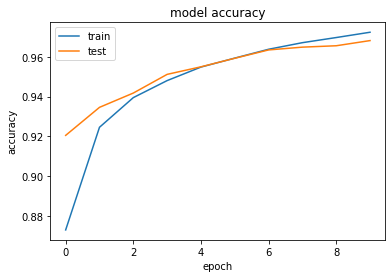

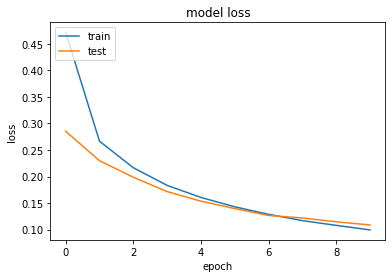

__________________________ neurons=1000 lr = 0.001 ___________________________


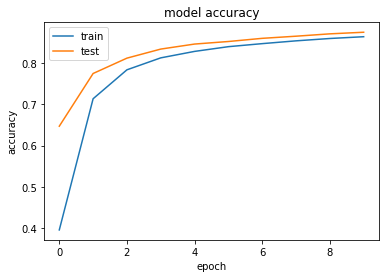

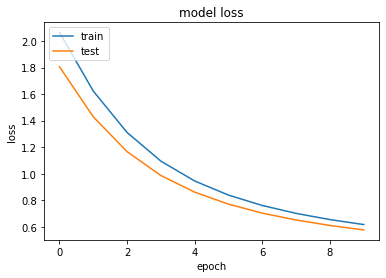

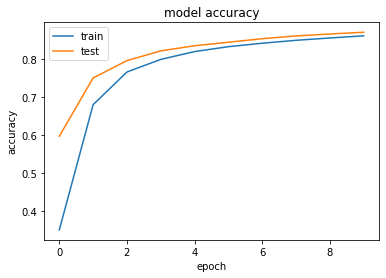

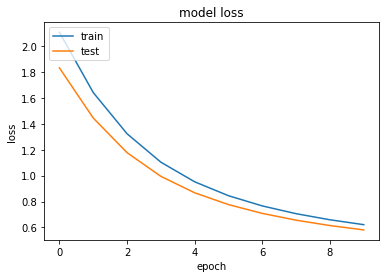

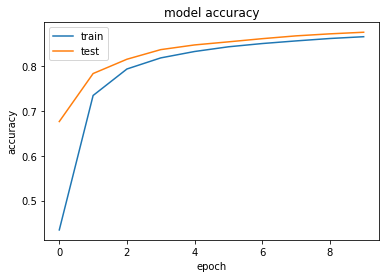

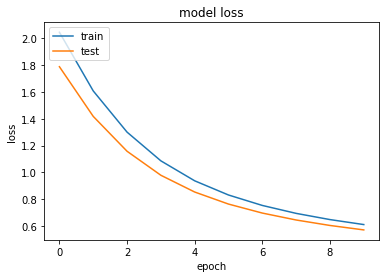

__________________________ neurons=1000 lr = 0.01 ___________________________


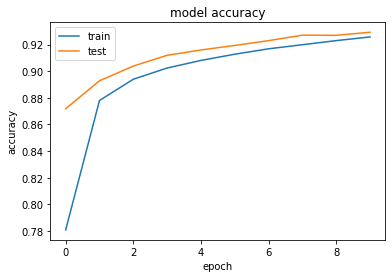

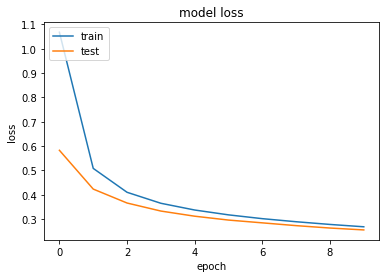

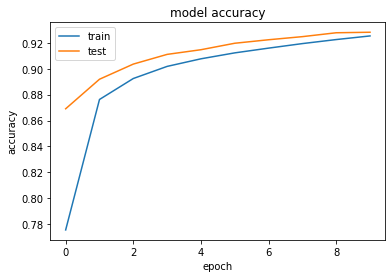

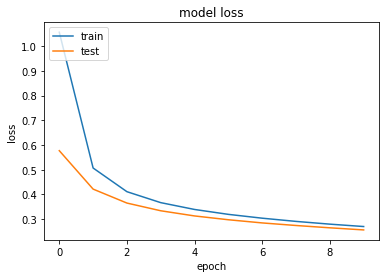

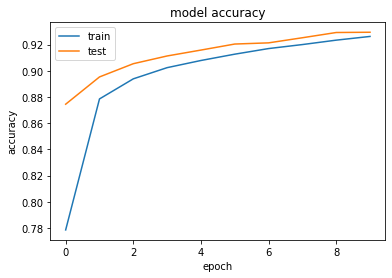

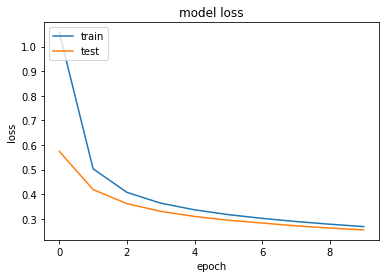

__________________________ neurons=1000 lr = 0.1 ___________________________


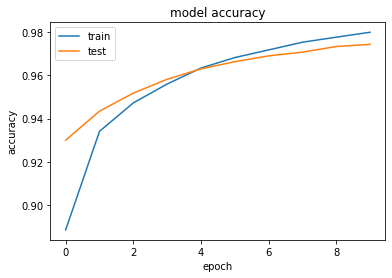

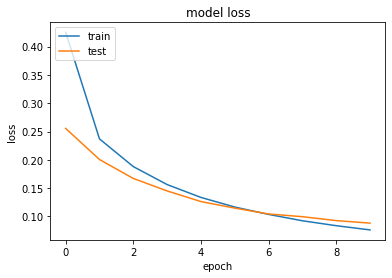

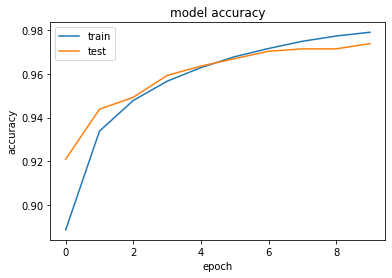

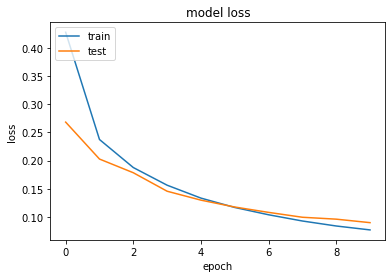

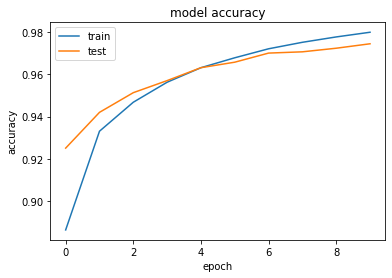

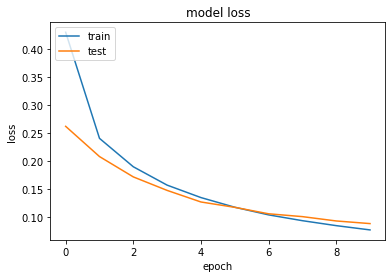

In [6]:
results = []

print("__________________________ neurons=10 lr = 0.001 ___________________________")
results.append(plotAccs(10,0.001,10, False,0,0))
print("__________________________ neurons=10 lr = 0.01 ___________________________")
results.append(plotAccs(10,0.01,10, False,0,0))
print("__________________________ neurons=10 lr = 0.1 ___________________________")
results.append(plotAccs(10,0.1,10, False,0,0))

In [ ]:
print("__________________________ neurons=100 lr = 0.001 ___________________________")
results.append(plotAccs(10,0.001,100, False,0,0))
print("__________________________ neurons=100 lr = 0.01 ___________________________")
results.append(plotAccs(10,0.01,100, False,0,0))
print("__________________________ neurons=100 lr = 0.1 ___________________________")
results.append(plotAccs(10,0.1,100, False,0,0))

__________________________ neurons=1000 lr = 0.001 ___________________________


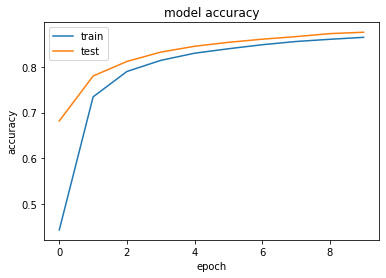

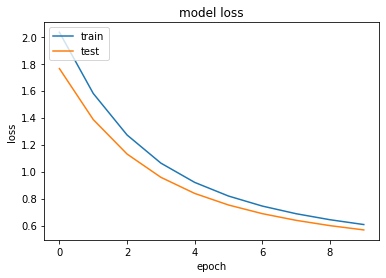

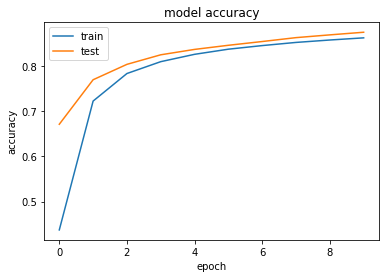

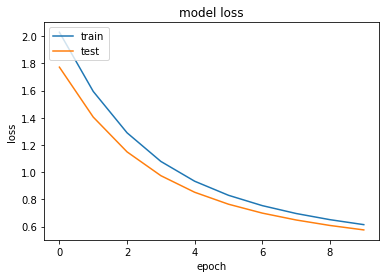

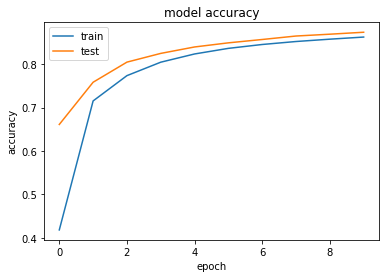

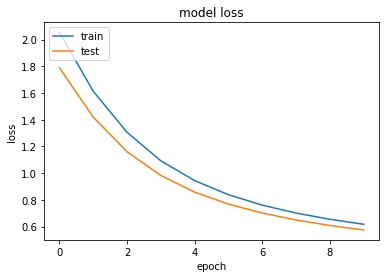

__________________________ neurons=1000 lr = 0.01 ___________________________


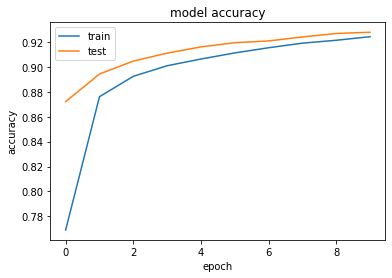

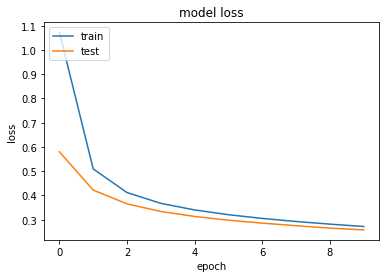

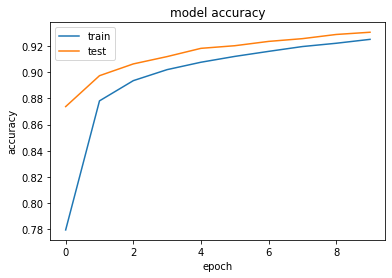

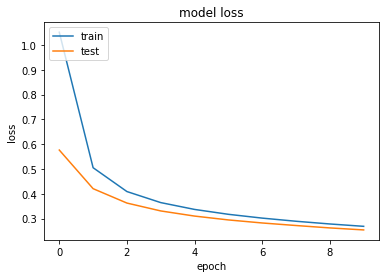

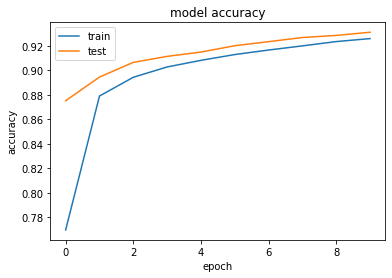

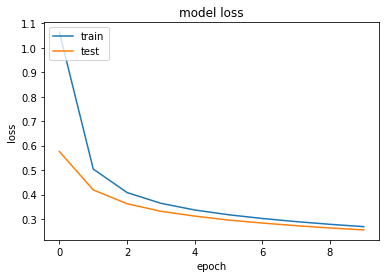

__________________________ neurons=1000 lr = 0.1 ___________________________


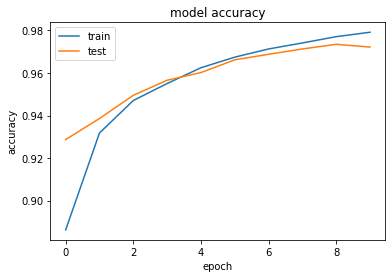

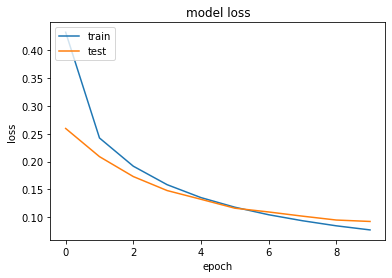

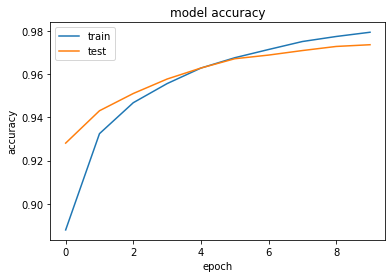

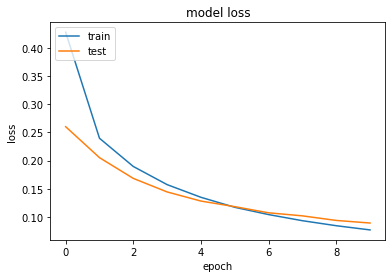

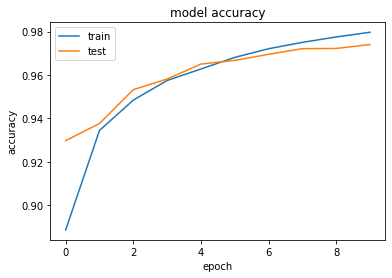

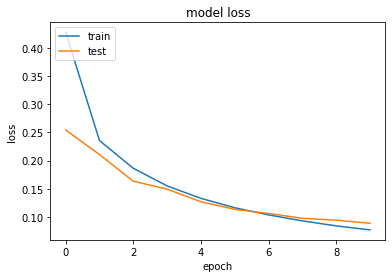

In [8]:
print("__________________________ neurons=1000 lr = 0.001 ___________________________")
results.append(plotAccs(10,0.001,1000, False,0,0))
print("__________________________ neurons=1000 lr = 0.01 ___________________________")
results.append(plotAccs(10,0.01,1000, False,0,0))
print("__________________________ neurons=1000 lr = 0.1 ___________________________")
results.append(plotAccs(10,0.1,1000, False,0,0))

In [7]:
barChart(results)

done


## 2.c

# 3


## 3.a

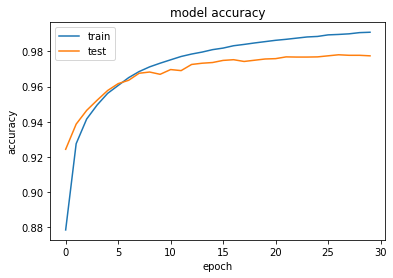

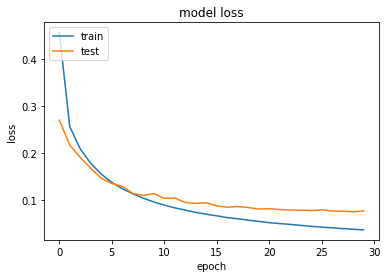

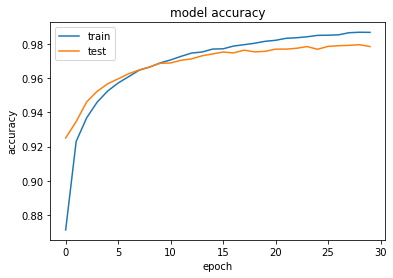

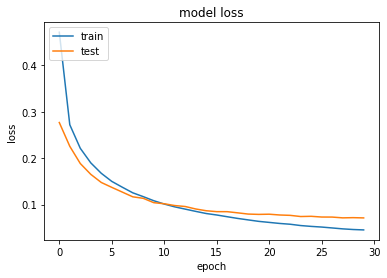

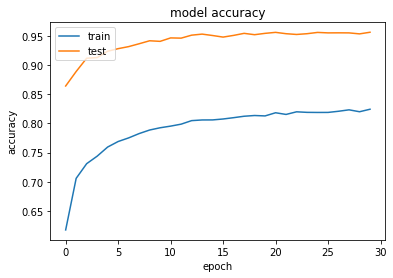

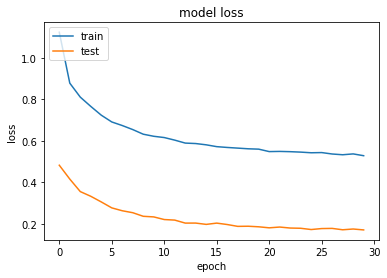

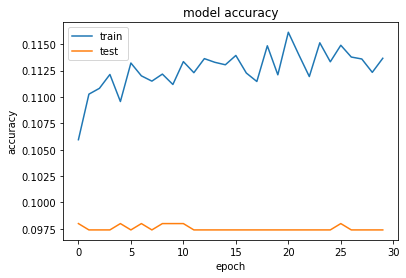

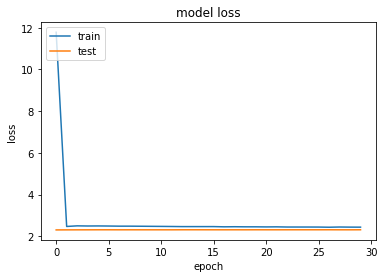

In [68]:
results = []
print("__________________ noise = 0 __________________")
results.append(plotAccs(30,0.1,100, True,0,0))
print("__________________ noise = 0.1 __________________")
results.append(plotAccs(30,0.1,100, True,0.1,0))
print("__________________ noise = 0.5 __________________")
results.append(plotAccs(30,0.1,100, True,0.5,0))
print("__________________ noise = 1 __________________")
results.append(plotAccs(30,0.1,100, True,1,0))
print("__________________ noise = 10 __________________")
results.append(plotAccs(30,0.1,100, True,10,0))

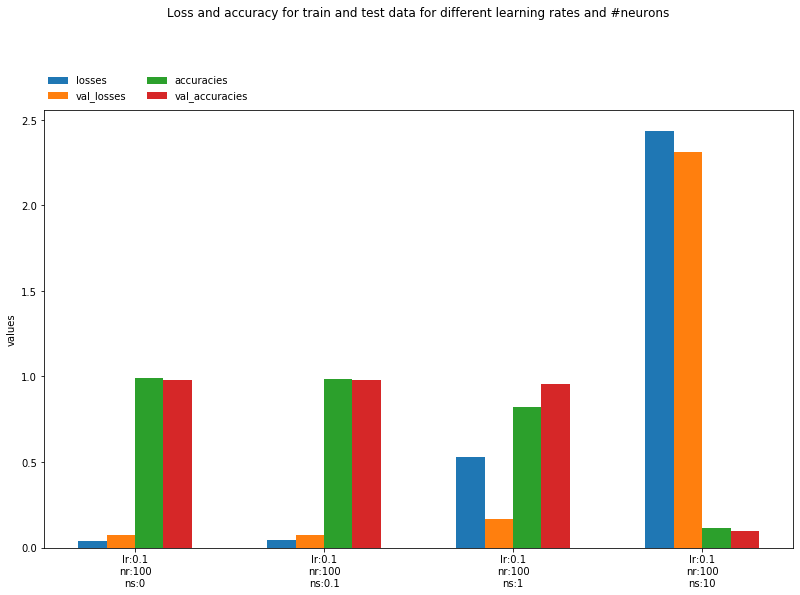

In [69]:
barChart(results)

## 3.b

__________________ regularization = 0 __________________


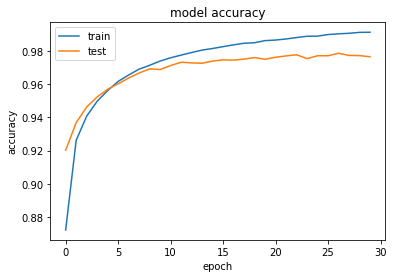

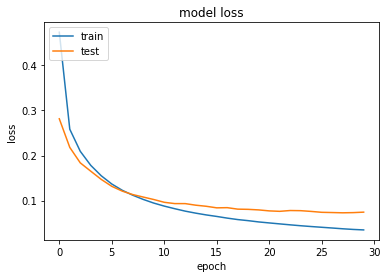

__________________ regularization = 0.1 __________________


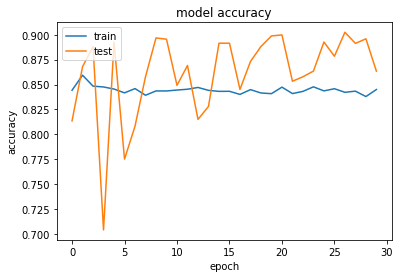

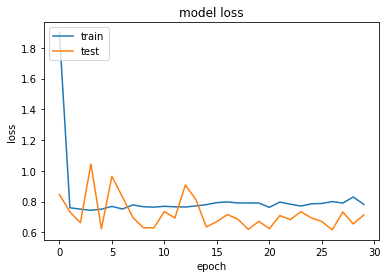

__________________ regularization = 0.01 __________________


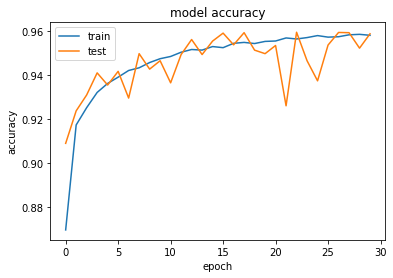

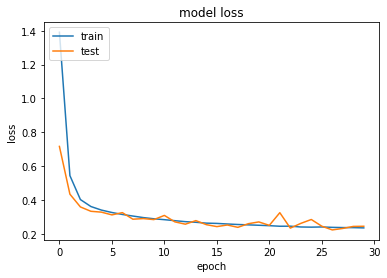

__________________ regularization = 0.001 __________________


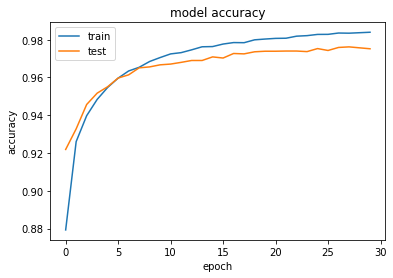

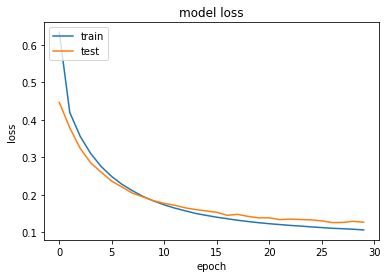

In [78]:
results = []
print("__________________ regularization = 0 __________________")
results.append(plotAccs(30,0.1,100, True,0,0))
print("__________________ regularization = 0.1 __________________")
results.append(plotAccs(30,0.1,100, True,0,0.1))
print("__________________ regularization = 0.01 __________________")
results.append(plotAccs(30,0.1,100, True,0,0.01))
print("__________________ regularization = 0.001 __________________")
results.append(plotAccs(30,0.1,100, True,0,0.001))

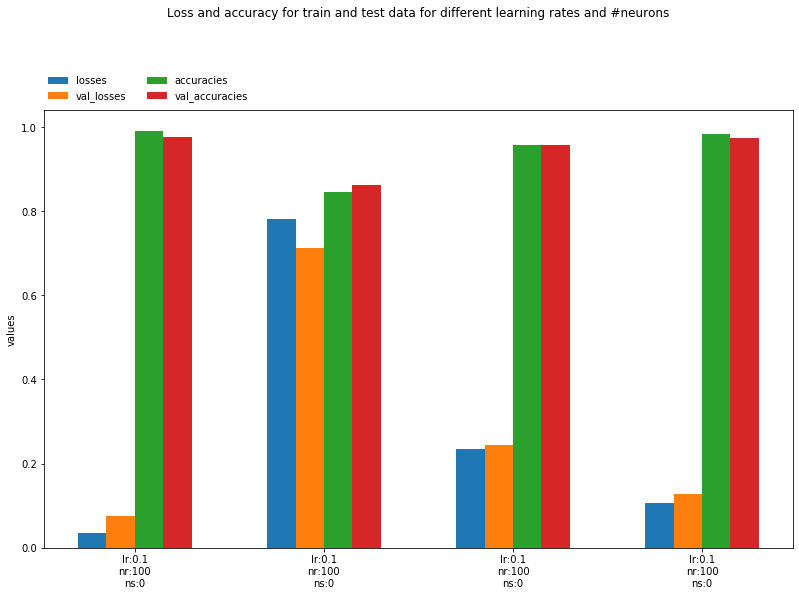

In [79]:
barChart(results)

# 4

## 4.a

In [80]:
# plot graphs of accuracies and losses if plot = True
# also returns a tuple of the lr, neurons and accuracies and losses for training and test data
def plotAccs2(epochs, lr, neurons, plot, noise, reg, conv):
    batch_size = 128
    num_classes = 10
    # input image dimensions
    img_rows, img_cols = 28, 28

    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    ## Define model ##
    model = Sequential()

    if (conv):
        model.add(Flatten())
        if noise != 0:
            model.add(GaussianNoise(noise))
        if reg != 0:
               model.add(Dense(neurons, activation = 'relu',kernel_regularizer=regularizers.l2(reg)))
        else:
            model.add(Dense(neurons, activation = 'relu'))
        model.add(Dense(num_classes, activation='softmax'))
    else:
        model.add(Conv2D(20, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(28,28,1)))
        #model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(100, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(num_classes, activation='softmax'))


    model.compile(loss=keras.losses.categorical_crossentropy,
                   optimizer=keras.optimizers.SGD(lr),
                   metrics=['accuracy'])

    fit_info = model.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=0,
               validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    #print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    
    # ----------------- print --------------
    if plot:
        history = fit_info
            #model.summary()
        # list all data in history
            #print(history.history.keys())
        # summarize history for accuracy
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        # summarize history for loss
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        
    loss = fit_info.history['loss'][epochs-1]
    val_loss = fit_info.history['val_loss'][epochs-1]
    accuracy = fit_info.history['accuracy'][epochs-1]
    val_accuracy = fit_info.history['val_accuracy'][epochs-1]
    
    return (lr, neurons, noise, loss,val_loss, accuracy, val_accuracy)

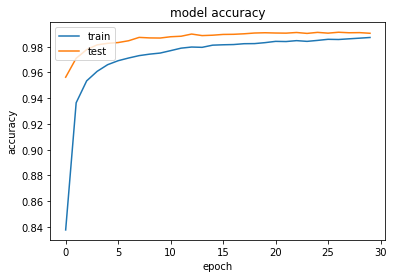

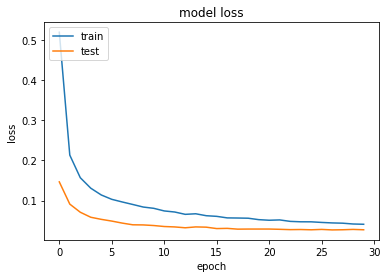

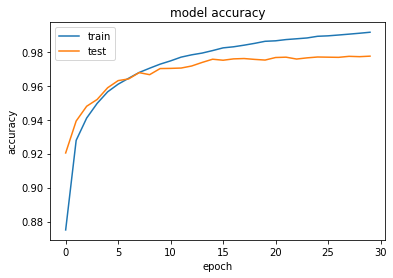

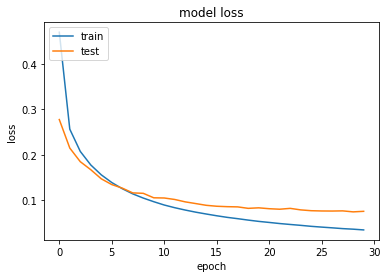

In [81]:
results = []
results.append(plotAccs2(30,0.1,100, True,0,0,False))
results.append(plotAccs2(30,0.1,100, True,0,0,True))

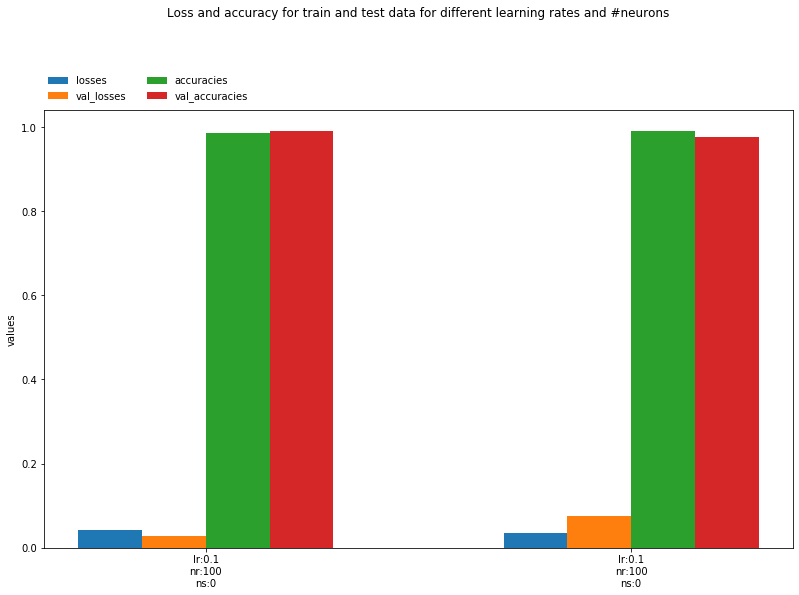

In [82]:
barChart(results)

## 4.b

Normal deep neural networks have simple input layers, output layers and one or more hidden layers. If you start with one hidden layer and the nadd one more, the accuracy of the validation data might improve. But as more and more layers are added, it is likely that the accuracy will get worse eventually, making deep networks hard to train.

Deep neural networks also have the issue of not adapting to displacing input, like if an input digit is moved to the left or the right. Convolutional networks can solve this however, and are therefore often used in image recognition.

Unlike deep networks, convolutional networks use local receptive fields, shared weights and pooling.

Local receptive fields work by specifying an area, like 5x5, which will then map a local receptive field of that size in the input neurons to a hidden layer, a feature map, each 5x5 local field goes to its own neuron. 

Each receptive field must have the same weight (shared weight) and bias (shared bias).

A convolutional layer consistes of one ore more efature maps, the amount of maps is the amount of different features that can be detected. A feature can be detected across the entire image (avoiding the displacing issue for deep networks).

Pooling layers are then used to summarize the information in the feature maps. Some area like 2x2 in a feature map is mapped to one neuron in the pooling layer. If max pooling is used, it detects whether a feature was in that 2x2 area, which would correspond to a 6*6 are in the input (four 5*5 areas overlapping).

Also note that the amount of pooling layers must be the same as the number of convolutional layers (number of feature maps)